In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv('combined_data_with_extra_data2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,ERR1075960,Male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1854747,Male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR688529,Male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1316059,Male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR5649200,Male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,SRR7690181,male,68.0,USA,28.75,Health,0.000000,0.021739,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,SRR7690182,female,69.0,USA,29.05,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,SRR7690183,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,SRR7690184,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['Run ID', 'Sex', 'Age', 'Country', 'BMI', 'Condition', 'Alistipes',
       'Bacteroides', 'Bifidobacterium', 'Blautia', 'Clostridium', 'Dorea',
       'Eubacterium', 'Faecalibacterium', 'Oscillibacter', 'Parabacteroides',
       'Roseburia', 'Ruminococcus', 'Unknown', 'Coprococcus', 'Lachnospira',
       'Oscillospira', 'Subdoligranulum', 'Sutterella', 'Anaerostipes',
       'Streptococcus', 'Akkermansia', 'Anaerofilum', 'Anaerotruncus',
       'Bacillus', 'Barnesiella', 'Desulfovibrio', 'Dialister',
       'Erysipelatoclostridium', 'Holdemania', 'Intestinibacter',
       'Lachnoclostridium', 'Lactobacillus', 'Odoribacter', 'Prevotella',
       'Pseudomonas', 'Sporobacter', 'Ruminiclostridium', 'Corynebacterium',
       'Eggerthella', 'Acinetobacter', 'Parasutterella', 'Veillonella',
       'Uncultured Organism', 'Ruminococcaceae', 'Phocaeicola',
       'Paraprevotella', 'Tidjanibacter', 'Flavonifractor',
       'Mediterraneibacter', 'Agathobacter', 'Ligilactobacillus',
       '

In [4]:
df['Ruminococcus'] += df[['Ruminococcaceae']].sum(axis=1)

In [5]:
df = df.drop(['Ruminococcaceae', 'Unknown', 'Uncultured Organism', 'Sex', 'Age', 'Country', 'BMI', 
             'Run ID'], axis=1)

In [6]:
numeric_cols = df.select_dtypes(include=['number'])
# df[df.sum(axis=1) == 0]
zero_rows = numeric_cols.sum(axis=1) == 0
#df = df.drop(zero_rows, axis=0)
df = df[~zero_rows]

In [7]:
df[numeric_cols.columns] = numeric_cols.div(numeric_cols.sum(axis=1), axis=0)

In [8]:
df.reset_index(drop=True)

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Health,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Health,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Health,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Health,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Health,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,Health,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df['Condition'].unique()

array(['Health', 'Parkinsons', 'Alzheimers',
       'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy', 'Depression', 'Schizophrenia'],
      dtype=object)

In [10]:
df_label = df['Condition']
df_label_string = df_label

In [11]:
dictionary = {'Health':0,
              'Parkinsons':1,
              'Alzheimers':2,
              'Bipolar Disorder, Depression, Schizophrenia': 3,
              'Bipolar Disorder, Depression, Epilepsy, Schizophrenia':4,
              'Bipolar Disorder':5,
              'Epilepsy':6,
              'Depression':7,
              'Schizophrenia':8
}

In [12]:
y = df_label.map(dictionary)

In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1639    5
1640    0
1642    5
1643    5
1644    5
Name: Condition, Length: 1608, dtype: int64

In [14]:
df = df.drop(['Condition'], axis=1)

In [15]:
df

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,0.031733,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,0.022425,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,0.003892,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,0.060624,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,0.044716,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
bins = [0, 0.33, 0.67, 1]
labels = ['low', 'medium', 'high']

numeric_cols = df.select_dtypes(include='number').columns 

for col in numeric_cols:
    #df[col] = df[col].astype('object')
    
    df.loc[:, col] = np.where(df[col] == 0, 0, 
                              pd.cut(df[col], bins=bins, labels=[f'{label}{col}' for label in labels], 
                                     include_lowest=True))
df

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,lowAlistipes,lowBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0,0,0,0,0,0,highEubacterium,0,lowOscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1640,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,highParaprevotella,0,0,0,0,0,0,0,0
1642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df.columns = range(1, len(df.columns) + 1)

In [19]:
df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,lowAlistipes,lowBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0,0,0,0,0,0,highEubacterium,0,lowOscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1640,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,highParaprevotella,0,0,0,0,0,0,0,0
1642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.loc[1238]

1                  lowAlistipes
2             mediumBacteroides
3            lowBifidobacterium
4                    lowBlautia
5                lowClostridium
6                      lowDorea
7                lowEubacterium
8           lowFaecalibacterium
9              lowOscillibacter
10           lowParabacteroides
11                 lowRoseburia
12              lowRuminococcus
13               lowCoprococcus
14                            0
15                            0
16                            0
17                            0
18                            0
19             lowStreptococcus
20               lowAkkermansia
21                            0
22             lowAnaerotruncus
23                  lowBacillus
24               lowBarnesiella
25                            0
26                 lowDialister
27    lowErysipelatoclostridium
28                lowHoldemania
29           lowIntestinibacter
30         lowLachnoclostridium
31             lowLactobacillus
32      

In [21]:
df.replace("0", pd.NA, inplace=True)
df = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

In [22]:
df = pd.DataFrame(df)
df.fillna('').replace('None', '', inplace=True)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,lowAlistipes,lowBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,0,0,0,0,0,0,highEubacterium,0,lowOscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1604,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,highParaprevotella,0,0,0,0,0,0,0,0
1605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.fillna(0, inplace=True)

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,lowAlistipes,lowBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,0,0,0,0,0,0,highEubacterium,0,lowOscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1604,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,highParaprevotella,0,0,0,0,0,0,0,0
1605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.loc[1238]

0                  lowAlistipes
1             mediumBacteroides
2            lowBifidobacterium
3                    lowBlautia
4                lowClostridium
5                      lowDorea
6                lowEubacterium
7           lowFaecalibacterium
8              lowOscillibacter
9            lowParabacteroides
10                 lowRoseburia
11              lowRuminococcus
12               lowCoprococcus
13                            0
14                            0
15                            0
16                            0
17                            0
18             lowStreptococcus
19               lowAkkermansia
20                            0
21             lowAnaerotruncus
22                  lowBacillus
23               lowBarnesiella
24                            0
25                 lowDialister
26    lowErysipelatoclostridium
27                lowHoldemania
28           lowIntestinibacter
29         lowLachnoclostridium
30             lowLactobacillus
31      

In [27]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{0, 'lowDorea', 'highBifidobacterium', 'mediumSubdoligranulum', 'mediumBacillus', 'lowSutterella', 'highPhocaeicola', 'highAkkermansia', 'lowCoprococcus', 'lowLachnoclostridium', 'mediumTidjanibacter', 'mediumAlistipes', 'highAlistipes', 'lowParasutterella', 'mediumPseudomonas', 'lowAnaerostipes', 'lowEggerthella', 'lowVeillonella', 'mediumClostridium', 'highIntestinibacter', 'highPrevotella', 'highPseudomonas', 'mediumAkkermansia', 'mediumParaprevotella', 'lowFaecalibacterium', 'highBlautia', 'highEscherichia', 'highParabacteroides', 'lowOscillospira', 'lowAnaerofilum', 'lowBifidobacterium', 'lowAgathobacter', 'lowParabacteroides', 'highAnaerobutyricum', 'mediumBifidobacterium', 'lowRuminiclostridium', 'mediumRuminiclostridium', 'mediumStreptococcus', 'highDorea', 'highParaprevotella', 'highRuminococcus', 'lowBarnesiella', 'lowClostridium', 'lowRoseburia', 'mediumDialister', 'mediumFaecalibacterium', 'lowAkkermansia', 'lowHoldemania', 'lowCollinsella', 'highFaecalibacterium', 'lowDial

In [28]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

# ohe -> One-Hot-Encoded
ohe_df = pd.DataFrame(encoded_vals).drop(columns=0)
ohe_df


,highBifidobacterium,mediumSubdoligranulum,lowBarnesiella,highOdoribacter,mediumBacillus,mediumDialister,mediumFaecalibacterium,highPhocaeicola,lowAkkermansia,lowHoldemania,...,lowFaecalibacterium,lowClostridium,lowRoseburia,lowBlautia,lowBifidobacterium,mediumBacteroides,lowParabacteroides,lowAlistipes,lowRuminococcus,lowOscillibacter
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1605,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = ohe_df

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [64]:
model = MultinomialNB()

In [65]:
model.fit(X_train, y_train)

MultinomialNB()

In [66]:
y_pred = model.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

0.8571

In [68]:
y_prob = model.predict_proba(X_test)
# rows are samples and the columns are the probabilities of that sample belonging to the corresponding class 
y_prob[1]

array([5.01341438e-23, 1.93726721e-27, 4.22337034e-22, 9.99088505e-01,
       7.59181674e-04, 2.47317542e-06, 1.49840190e-04, 5.11348631e-17,
       3.40610289e-19])

In [69]:
y_test_array = np.array(y_test)
y_test_bin = label_binarize(y_test_array, classes=np.arange(9))  # Shape: (num_samples, 8)
y_test_bin[1]

array([0, 0, 0, 1, 0, 0, 0, 0, 0])

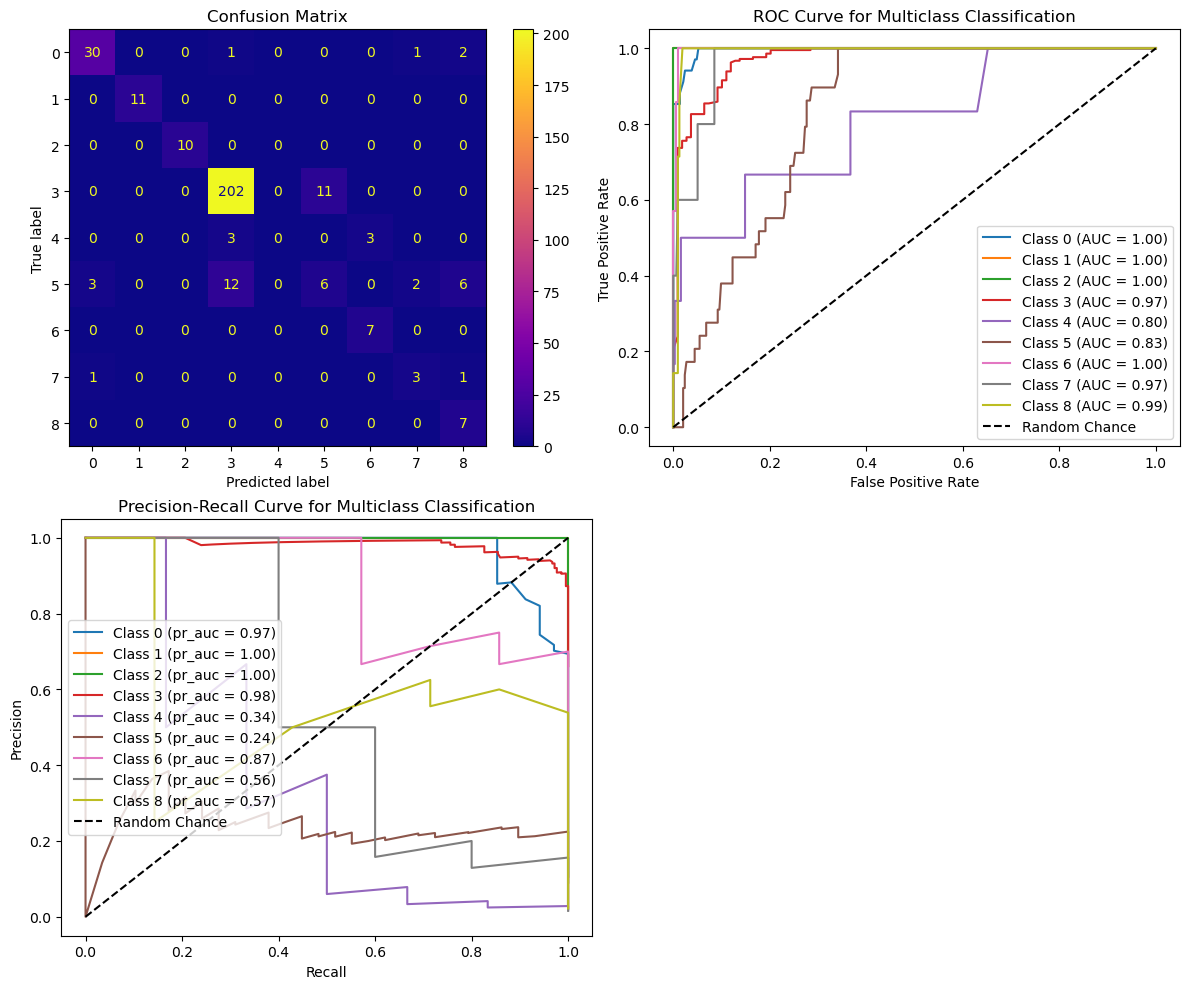

In [71]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
for i in range(9): 
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0, 1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification')
axs[0, 1].legend()

# precision-recall curve
for i in range(9): 
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc = auc(recall, precision)
    axs[1, 0].plot(recall, precision, label=f'Class {i} (pr_auc = {pr_auc:.2f})')

axs[1, 0].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('categorical_nb_full_data.jpg')
plt.show()


In [46]:
# better accuracy than without the bins 
# slightly better auc roc and precision recall scores for the lower classes 